# Wiktor Ciołek 311501 SATFD laboratory 1 10.03.2024

In [2]:
import numpy as np
from scipy import fft
from scipy.io import wavfile
from scipy.signal import windows, find_peaks
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True

# 1. Introduction
Signal analysis in time and frequency domain provides methods to explore different properties of a given sound produced by a musical instrument. In this exercise we focus on string instruments as the signal we analyse was produced by such. A tone melody or a tone was played and recordes as .wav file which was provided in the exercise [(path in local device)](../sounds/chord.wav). The aim of this project consisted of two parts:
1. Presenting the signal in its time domain and then transforming it into its frequency power spectrum
2. Identifying fundamental tones by frequncy analysis


# 2. Importing data and plotting the signal in time domain
First the provided file was imported and then, using the information about the sampling rate, displayed as a function of time. One can note that the duration of the recording (about 6 seconds) is considerable for a single tone to be played.

Text(0, 0.5, 'signal')

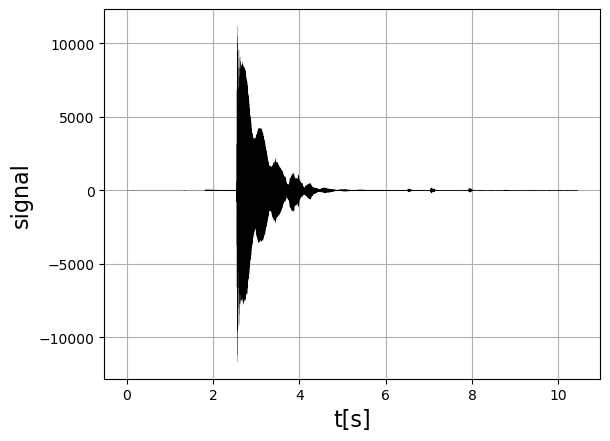

In [3]:
samplerate, data = wavfile.read('../sounds/gitara.wav')
data_len = len(data)
plt.plot(np.arange(data_len) / samplerate, data, 'k', linewidth=0.1)
plt.xlabel('t[s]', fontsize=16)
plt.ylabel('signal', fontsize=16)

# 3. Fourier transform and the power spectrum
Frequencies observed in the signal can be obtained by applying Fourier Transform to the signal in time domain. Fast fourier transform algorithm provided by *NumPy* library was used to do that. Additionally, frequencies below 16 Hz and above 4 kHz were cut off from the signal as they aren't meaningful in analysing musical sounds. The resulting plot is shown below and some frequncies are particularly present as one would expect.

Text(0, 0.5, 'Power')

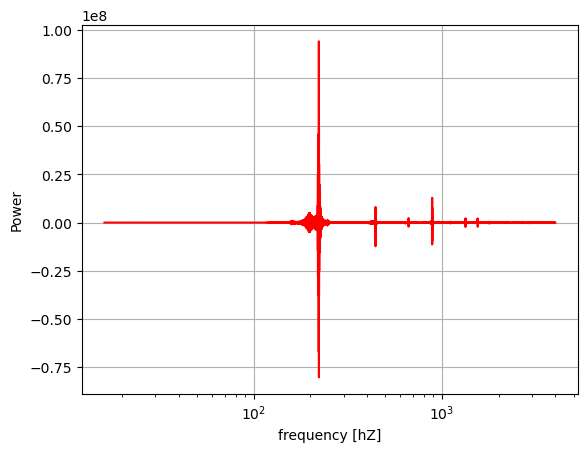

In [19]:
fft_data = np.fft.fft(data)
fft_freqs = fft.fftfreq(data_len, 1 / samplerate)
freq_range = (fft_freqs >= 16) & (fft_freqs <= 4e3)
fft_data = fft_data[freq_range]
fft_freqs = fft_freqs[freq_range]
plt.plot(fft_freqs, np.real(fft_data), 'r')
plt.xscale('log')
plt.xlabel('frequency [hZ]')
plt.ylabel('Power')

# 4. Tones identification
The method provided below takes a frequency value and returns the tone whose frequency is the closest. There are twelve so called semitones: C, C#, D, D#, E, F, F#, G, G#, A, A#, B. Each of them is divided into eight octaves resulting in 96 potential candidates for a given frequency. The fundamental tone is A~4~=440 Hz (4-th octave of semitone A). Every other adjacent tones are in the ratio $\sqrt[12]{2}$. The usage of the provided method is as following. Peaks of the signal and its corresponding frequencies were found using a method provided by *scipy.signal* library. The closest tone in terms of absolute distance was found and printed out below. The deviation was calculated. Its presence is a result of an imperfect tuning of the instrument used. Eleven tones were marked on a power spectrum with log-log scale. 

In [20]:
def identify_tone(peak_freq):
    min_note = -57
    max_note = 39
    tone_freqs = 440 * np.power(2, np.arange(min_note, max_note + 1) / 12)
    base_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    tone_names = np.array([[
        f"{base_names[halftone]}{octave}"
        for halftone in range(12)]
        for octave in range(8)
    ]).flatten()

    idx = np.argmin(np.abs(peak_freq - tone_freqs))
    return tone_freqs[idx], tone_names[idx]
    

Peak frequency	Nearest fundamental tone	Name	Absolute dev.	Relative dev.
246.15	246.94	B3	0.79	0.00
1547.33	1567.98	G6	20.65	0.01
231.60	233.08	A#3	1.48	0.01
188.82	185.00	F#3	3.83	0.02
1331.42	1318.51	E6	12.91	0.01
664.28	659.26	E5	5.02	0.01
211.60	207.65	G#3	3.95	0.02
198.87	196.00	G3	2.87	0.01
886.31	880.00	A5	6.31	0.01
442.82	440.00	A4	2.82	0.01
221.55	220.00	A3	1.55	0.01


(100, 800)

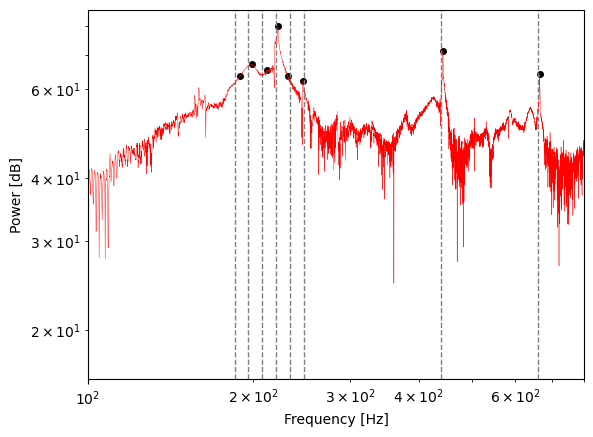

In [21]:
spectrum = 10 * np.log10(np.abs(fft_data) + 1e-15)
peaks, _ = find_peaks(spectrum, distance=100)
peaks = peaks[np.argsort(spectrum[peaks])[-11:]]

print("Peak frequency\tNearest fundamental tone\tName\tAbsolute dev.\tRelative dev.")
for peak_freq in fft_freqs[peaks]:
    freq, name = identify_tone(peak_freq)
    diff = np.abs(peak_freq-freq)
    print(f"{peak_freq:.2f}\t{freq:.2f}\t{name}\t{diff:.2f}\t{diff/freq:.2f}")
    plt.axvline(freq, linestyle='--', linewidth = 1, color = 'grey')



plt.scatter(fft_freqs[peaks], spectrum[peaks], c="black", s=16)
plt.plot(fft_freqs, spectrum, 'r', linewidth=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Power [dB]')
plt.xlabel('Frequency [Hz]')
plt.xlim(10**2, 8*10**2)
# plt.xticks([int(f) for f in fft_freqs[peaks]])

# 5. Summary
The exercise utilizes methods of transforming a signal from its time domain into its frequency domain. Such methods are sufficient to identify which note or melody was played in an original act. 